In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
print("Train data shape:",train.shape)
print("Test data shape:",test.shape)

Train data shape: (1460, 81)
Test data shape: (1459, 80)


In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize']=(10,6)

# <br> Explore the data and engineer features.

In [8]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skew is: 1.88287575977


<IPython.core.display.Javascript object>


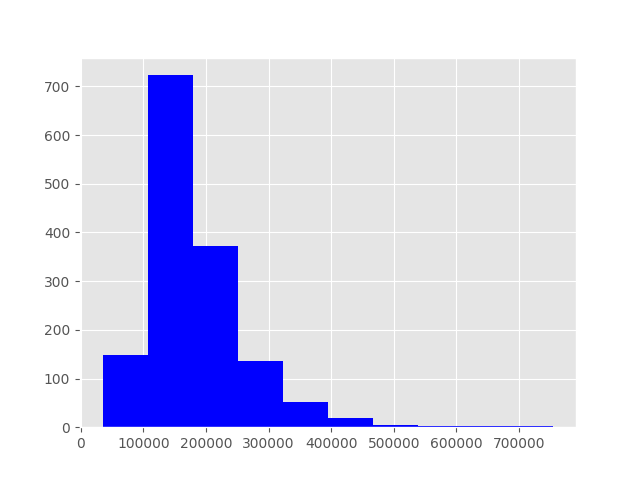

In [12]:
print("Skew is:",train.SalePrice.skew())
%matplotlib notebook
plt.hist(train['SalePrice'], color='blue')
plt.show()

<IPython.core.display.Javascript object>


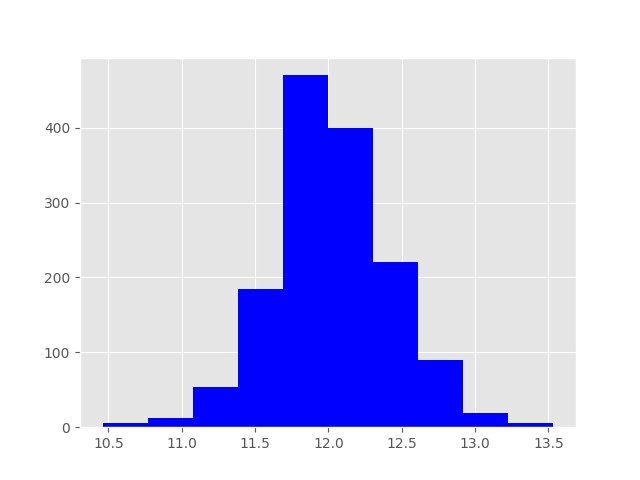

Skew is: 0.121335062205


In [19]:
plt.figure()
target = np.log(train.SalePrice)
print("Skew is:", target.skew())
plt.hist(target, color='blue')
plt.show()

### Working with Numeric Features

In [14]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [15]:
corr=numeric_features.corr()

In [16]:
corr2 = corr[corr.index[corr['SalePrice']>0.6]].loc[corr.index[corr['SalePrice']>0.6]]

<IPython.core.display.Javascript object>


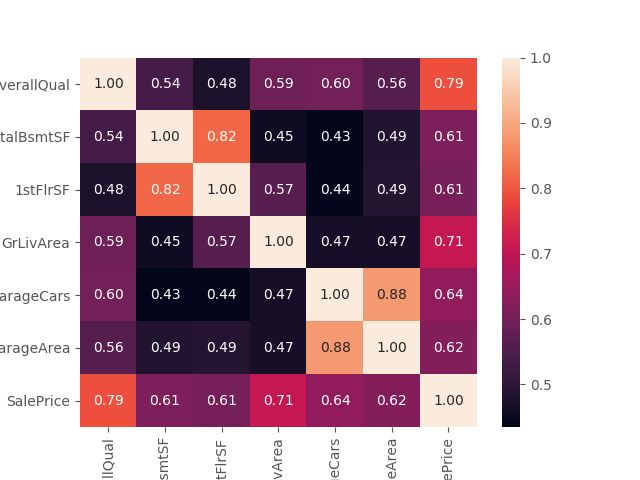

In [18]:
plt.figure()
sns.heatmap(corr2,annot=True, fmt=".2f")

In [20]:
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

In [21]:
quality_pivot = train.pivot_table(index='OverallQual',values='SalePrice',
                                 aggfunc = 'median')

In [22]:
quality_pivot

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


<IPython.core.display.Javascript object>


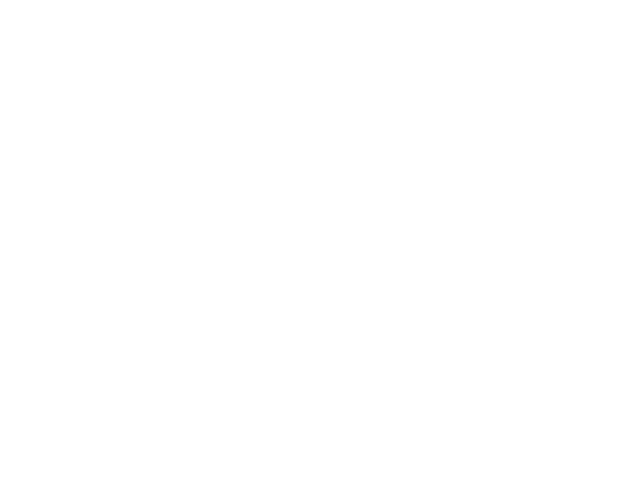

<IPython.core.display.Javascript object>


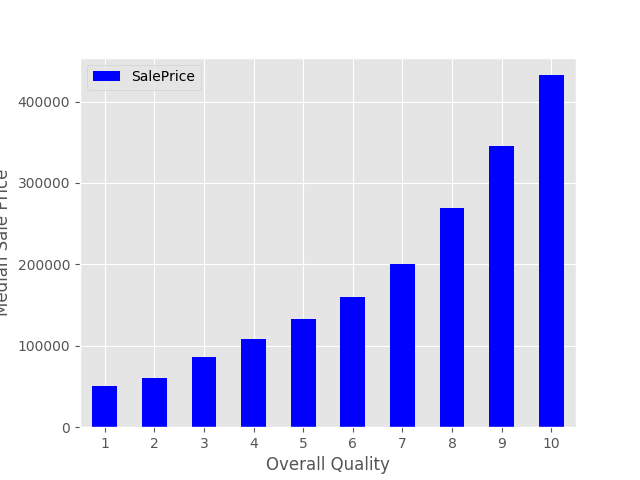

In [23]:
plt.figure()
quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

<IPython.core.display.Javascript object>


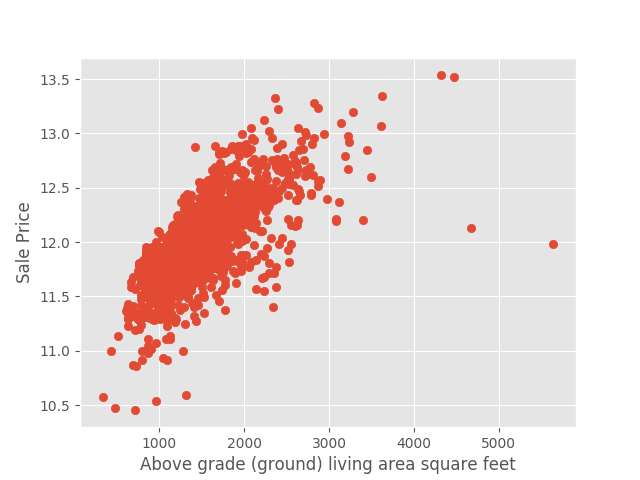

In [24]:
plt.figure()
plt.scatter(train.GrLivArea,target)
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

<IPython.core.display.Javascript object>


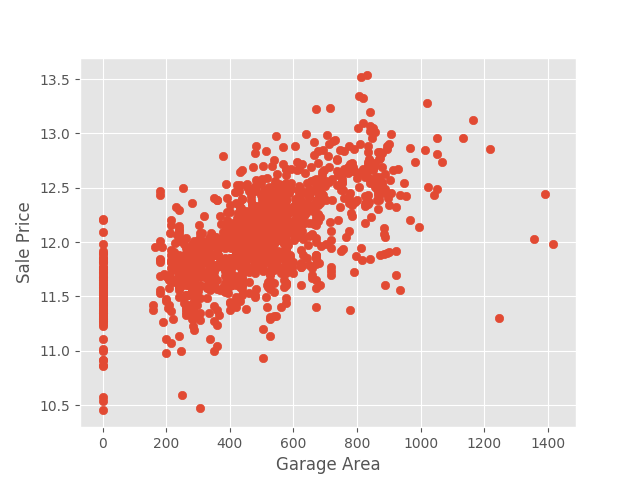

In [25]:
plt.figure()
plt.scatter(train.GarageArea,target)
plt.xlabel('Garage Area')
plt.ylabel('Sale Price')
plt.show()

In [26]:
train = train[train.GarageArea<1200]

<IPython.core.display.Javascript object>


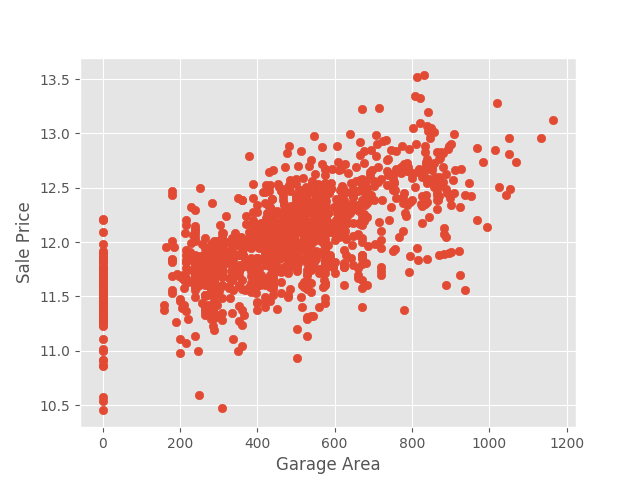

In [27]:
plt.figure()
plt.scatter(train.GarageArea, np.log(train.SalePrice))
plt.xlabel('Garage Area')
plt.ylabel('Sale Price')
plt.show()

In [29]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False))

In [30]:
nulls.index.name = 'Feature'
nulls.columns = ['Null Count']
nulls.head()

,Null Count
Feature,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689


In [31]:
train.PoolQC.value_counts(dropna=False)

NaN    1449
Fa        2
Gd        2
Ex        2
Name: PoolQC, dtype: int64

In [32]:
print("Unique values are:", train.MiscFeature.unique())

Unique values are: [nan 'Shed' 'Gar2' 'Othr' 'TenC']


# Wrangling the non-numeric Features

In [33]:
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,...,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Fa,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,...,867,605,1306,1321,1335,2,157,48,1266,1196


* Count - Denote the non-null values present in the column
* top - Most frequent term
* freq - frquency of the top term

In [34]:
print("Original: \n")
print(train.Street.value_counts(dropna=False),"\n")

Original: 

Pave    1450
Grvl       5
Name: Street, dtype: int64 



In [35]:
train['enc_street']=pd.get_dummies(train.Street, drop_first=True)

In [36]:
print("Encode: \n")
print(train.enc_street.value_counts(dropna=False),"\n")

Encode: 

1    1450
0       5
Name: enc_street, dtype: int64 



In [38]:
train.SaleCondition.value_counts(dropna=False)

Normal     1196
Partial     122
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [39]:
condition_pivot = train.pivot_table(index='SaleCondition',values='SalePrice',
                    aggfunc='median')

<IPython.core.display.Javascript object>


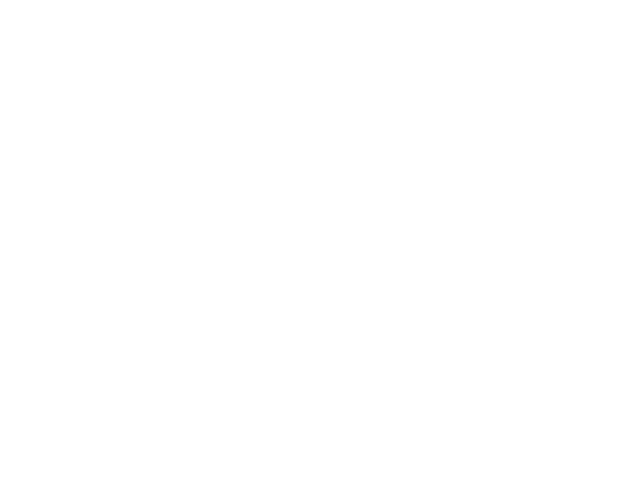

<IPython.core.display.Javascript object>


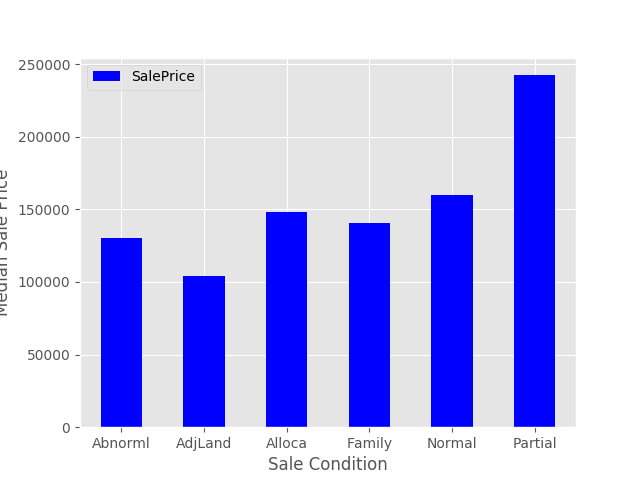

In [41]:
plt.figure()
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [42]:
train['enc_condition'] = train.SaleCondition.apply(lambda x:1 if x =='Partial' else 0)
test['enc_condition'] = test.SaleCondition.apply(lambda x:1 if x =='Partial' else 0)

<IPython.core.display.Javascript object>


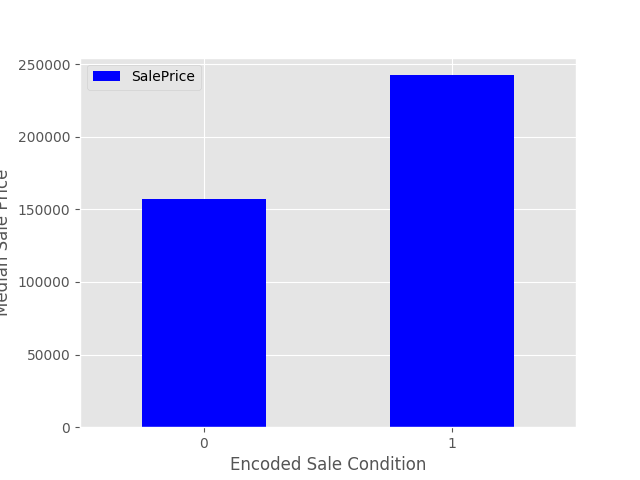

In [43]:
condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

<IPython.core.display.Javascript object>


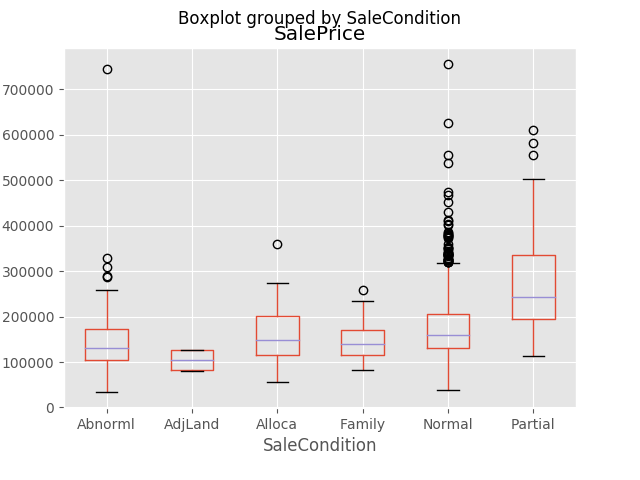

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


In [46]:
train.boxplot(column='SalePrice', by='SaleCondition')
plt.show()

In [35]:
train.pivot_table(index='SaleCondition',values='SalePrice',aggfunc='describe')

,25%,50%,75%,count,max,mean,min,std
SaleCondition,,,,,,,,
Abnorml,104000.00,130000.0,172500.0,101.0,745000.0,146526.623762,34900.0,82796.213395
AdjLand,81750.00,104000.0,126375.0,4.0,127500.0,104125.000000,81000.0,26135.464411
Alloca,116383.25,148145.0,202043.0,12.0,359100.0,167377.416667,55993.0,84460.527502
Family,115500.00,140500.0,170250.0,20.0,259000.0,149600.000000,82500.0,47820.002421
Normal,130000.00,160000.0,205237.5,1196.0,755000.0,175287.005853,39300.0,69718.350291
Partial,193909.25,242300.0,336218.5,122.0,611657.0,272444.065574,113000.0,103958.379884


In [55]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna()

In [59]:
sum(data.isnull().sum()!=0)

0

In [63]:
sum(numeric_features.isnull().sum().sort_values(ascending=False)[:3])

348

In [65]:
data.shape

(1455, 40)

# <br> Build a linear model